In [1]:
import pandas as pd

In [2]:
#dataSet
dataSet = pd.read_csv('Placement.csv')
dataSet = dataSet.drop(['sl_no'], axis = 1)
dataSet.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
# check the rows and columns
dataSet.shape

(215, 14)

## 1) Replace the NaN values with correct value. And justify why you havechosen the same
why i choose the zero means some students are not placed that's only that place have null values.
#so, i put the zero in salary columns

In [4]:
dataSet['salary'].fillna(0, inplace = True)

In [5]:
# Now check the values
dataSet.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

## 2) How many of them are not placed?
sixty seven students are not placed in the company

In [6]:
notPlaced = dataSet[dataSet['status'] == 'Not Placed']

In [7]:
len(notPlaced['status'])

67

## 3) Find the reason for non placement from the dataset?
In the mean result of placement and non placement. The placement students got more marks to the non placement students
so, the non placement students got below (60 & 70) and there studies is poor

In [8]:
placement = dataSet[dataSet['status'] == 'Placed']
nonplacement = dataSet[dataSet['status'] == 'Not Placed']

In [9]:
nonplacement.mean() # 50 to 70

ssc_p       57.544030
hsc_p       58.598358
degree_p    61.134179
etest_p     69.587910
mba_p       61.612836
salary       0.000000
dtype: float64

In [10]:
placement.mean() # 60 to 80

ssc_p           71.721486
hsc_p           69.837027
degree_p        68.723649
etest_p         73.238041
mba_p           62.579392
salary      287076.013514
dtype: float64

## 4)What kind of relation between salary and mba_p
Relation between salary and mba_p is 0.141417 is postive value but is average postive value 😞.
And its directly proportional

In [11]:
dataSet.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


## 5)Which specialization is getting minimum salary?
The minimum salary of Mkt&HR is 200000.0 and also same salar getting Mkt&Fin 

In [73]:
specialisationSalary = dataSet[dataSet['salary'] != 0.0]

In [70]:
Mkt_HR = specialisationSalary[specialisationSalary['specialisation'] == 'Mkt&HR']
Mkt_Fin = specialisationSalary[specialisationSalary['specialisation'] == 'Mkt&Fin']

In [71]:
Mkt_HR['salary'].min()

200000.0

In [72]:
Mkt_Fin['salary'].min()

200000.0

## 6)How many of them getting above 500000 salary?
Only three students getting above 500000 salary

In [14]:
Placed = dataSet[dataSet['status'] == 'Placed']
above_5L = Placed[dataSet['salary'] > 500000]

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [15]:
above_5L

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
119,M,60.8,Central,68.40,Central,Commerce,64.6,Comm&Mgmt,Yes,82.66,Mkt&Fin,64.34,Placed,706250.0
150,M,71.0,Central,58.66,Central,Science,58.0,Sci&Tech,Yes,56.00,Mkt&Fin,61.30,Placed,690000.0
177,F,73.0,Central,91.15,Others,Commerce,79.0,Comm&Mgmt,Yes,89.00,Mkt&Fin,70.81,Placed,650000.0


## 7)Test the Analysis of Variance between etest_p and mba_p at signifancelevel 5%.(Make decision using Hypothesis Testing)
There is no significant difference in one way analysis
46%

In [16]:
import scipy.stats as stats 
stats.f_oneway(dataSet['etest_p'], dataSet['mba_p'])

F_onewayResult(statistic=98.64487057324706, pvalue=4.672547689133573e-21)

In [17]:
# H0 : There is no significant difference
# H1 : There is significant difference

In [18]:
# There is no significant difference in one way analysis

## 8)Test the similarity between the degree_t(Sci&Tech) and specialisa-tion(Mkt&HR) with respect to salary at significance level of 5%.(Makedecision using Hypothesis Testing)
This is Independant Sample. Different group same condition. There is zero significant

In [19]:
from scipy.stats import ttest_ind
Sci_Tech = dataSet[dataSet['degree_t'] == 'Sci&Tech']['salary']
Mkt_HR = dataSet[dataSet['specialisation'] == 'Mkt&HR']['salary']
ttest_ind(Sci_Tech, Mkt_HR)

Ttest_indResult(statistic=2.692041243555374, pvalue=0.007897969943471179)

## 9)Convert the normal distribution to standard normal distribution for salary column

In [20]:
import seaborn as sns

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


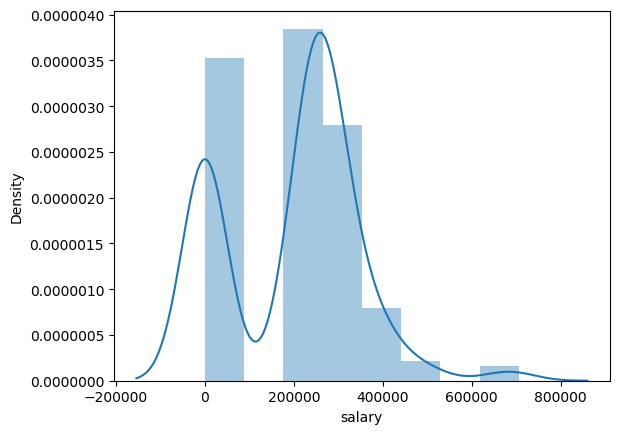

In [21]:
sns.distplot(dataSet['salary'])

In [22]:
# standard normal distribution
def stdNBgraht(dataSet):
    import seaborn as sns
    mean = dataSet.mean()
    std = dataSet.std()
    
    values = [i for i in dataSet]
    
    z_score = [((j-mean) / std) for j in values]
    
    sns.distplot(z_score, kde=True)
    
    sum(z_score)/len(z_score)

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


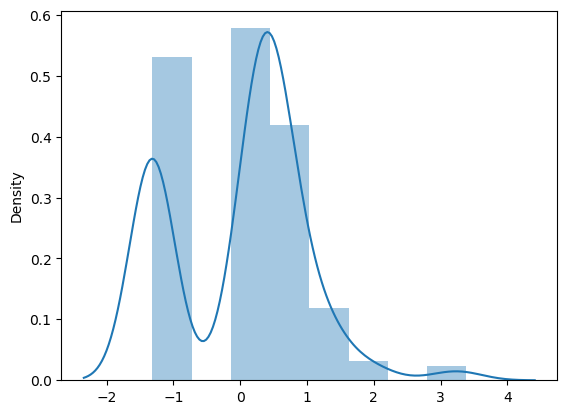

In [23]:
stdNBgraht(dataSet['salary'])

## 10)What is the probability Density Function of the salary range from700000 to 900000?
The probability density of the salary range from 700000 to 900000 is 0.0004137812663830059.
### 0%

In [24]:
def get_pdf_probability(dataSet, startRange, endRange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataSet, kde= True, kde_kws={'color':'blue'}, color='Green')
    pyplot.axvline(startRange, color='Red')
    pyplot.axvline(endRange, color='Red')
    sample = dataSet
    sample_mean = sample.mean()
    sample_std = sample.std()
    print('mean= %.3f, Standard deviation=%.3f' % (sample_mean, sample_std))
    dist = norm(sample_mean, sample_std)
    values = [value for value in range(startRange, endRange)]
    probabilities = [dist.pdf(value) for value in values]
    prob = sum(probabilities)
    print('the area between range({},{}):{}'.format(startRange, endRange, sum(probabilities)))
    return prob

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


mean= 197615.116, Standard deviation=150305.844
the area between range(700000,900000):0.0004137812663830048


0.0004137812663830048

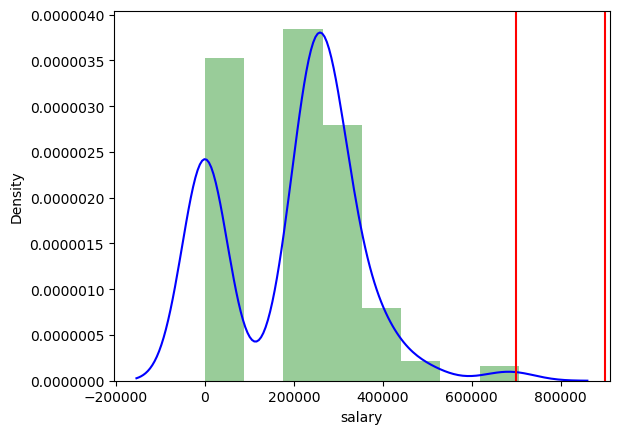

In [25]:
get_pdf_probability(dataSet['salary'], 700000, 900000)

## 11)Test the similarity between the degree_t(Sci&Tech) with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hy-pothesis Testing)
Dependant Sample - paired T Test because same group different condition
#### There is no significant difference
#### p-value is 5.51

In [26]:
from scipy.stats import ttest_rel
sci_TechOne = dataSet[dataSet['degree_t'] == 'Sci&Tech']['etest_p']
sci_TechTwo = dataSet[dataSet['degree_t'] == 'Sci&Tech']['mba_p']
ttest_rel(sci_TechOne,sci_TechTwo)

Ttest_relResult(statistic=5.0049844583693615, pvalue=5.517920600505392e-06)

In [27]:
# H0 : There is no significant difference
# H0 : There is significant difference

## 12)Which parameter is highly correlated with salary?
#### The  ssc_p and salary parameter is highly correlated

In [28]:
dataSet.corr()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.513478,0.538686,0.261993,0.388478,0.558475
hsc_p,0.513478,1.000000,0.434606,0.240775,0.348452,0.459424
degree_p,0.538686,0.434606,1.000000,0.227147,0.402376,0.423762
etest_p,0.261993,0.240775,0.227147,1.000000,0.218055,0.186775
mba_p,0.388478,0.348452,0.402376,0.218055,1.000000,0.141417
salary,0.558475,0.459424,0.423762,0.186775,0.141417,1.000000


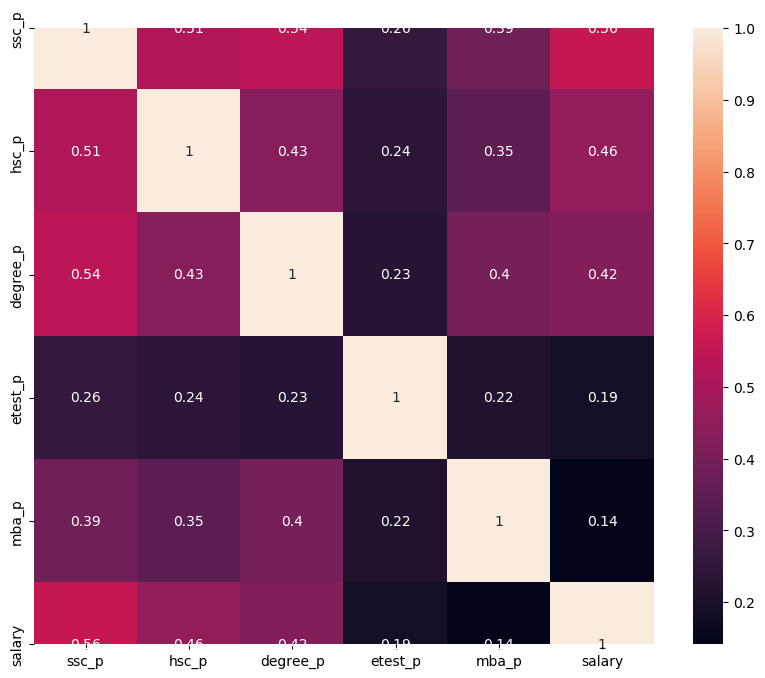

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
dataplot = sns.heatmap(dataSet.corr(), cmap="rocket", annot=True)
plt.show()

## 13) plot any useful graph and explain it.

C:\Users\REVANTH KUMAR\Anaconda3\envs\hopeAi\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


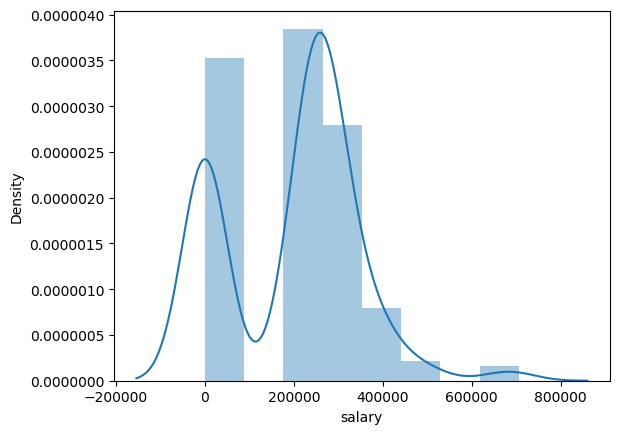

In [30]:
import seaborn as sns
sns.distplot(dataSet['salary'])